# Import all important libraries


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# LOAD DATASET

In [23]:
data = pd.read_csv("Country-data.csv")

In [24]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [26]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [27]:
# NOW i want to create a correlation matrix and plot in form of heat map to visualize the relationship betweem all columns

df = data.drop(columns=["country"])

In [28]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [29]:
corr_mat = df.corr()

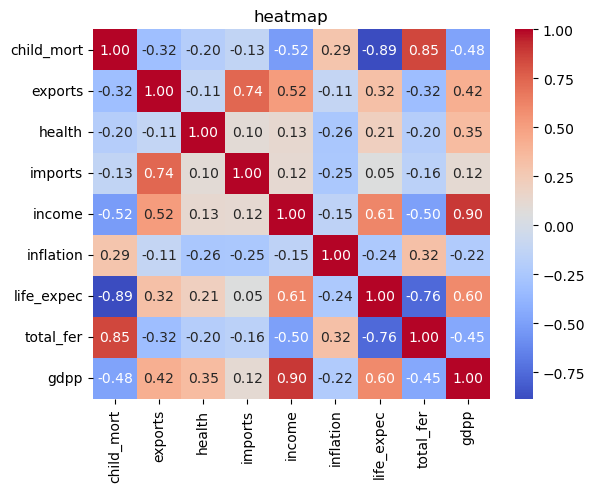

In [30]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("heatmap")
plt.show()

on visualize this heatmap i found some observation 
1. child_mort and total_fer has good relation
2. export and import has good relation 
3. income and gdpp has good relation 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [87]:
count_data = df[["child_mort","imports","gdpp"]]

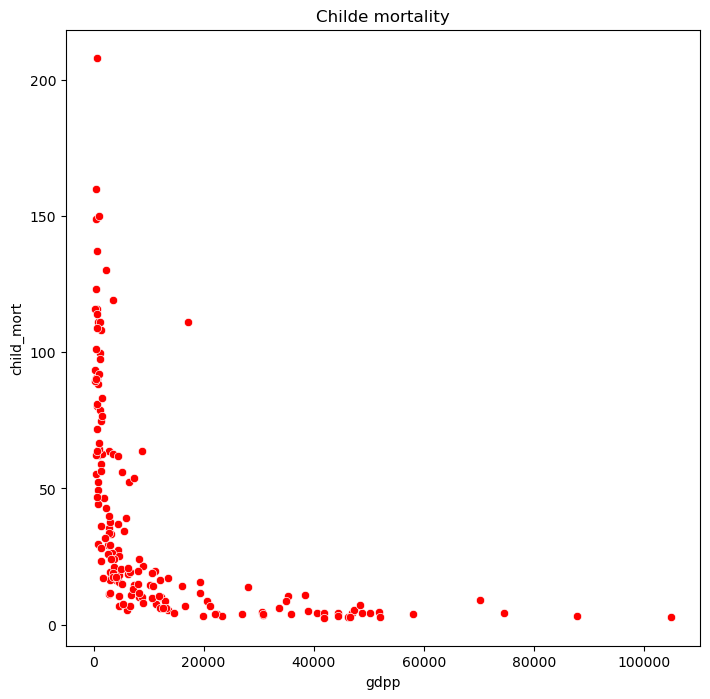

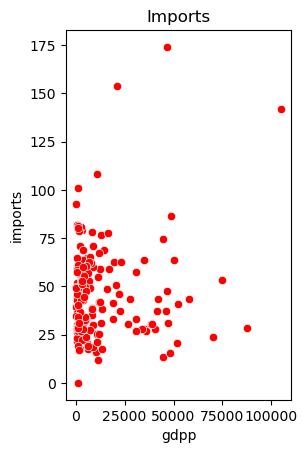

In [88]:
# Now i plot a scatter between child_mort and gdpp , imports and gdpp
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.scatterplot(x = count_data["gdpp"],y=count_data["child_mort"],color = "RED")
plt.title("Childe mortality")
plt.show()
plt.subplot(1,2,2)
sns.scatterplot(x = count_data["gdpp"],y=count_data["imports"],color = "RED")
plt.title("Imports")
plt.show()

In [92]:
# Elbow method
number_of_cluster = range(1,11)
clusterings = [KMeans(n_clusters = k).fit(count_data) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(count_data, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/count_data.shape[0] for d in dist] 


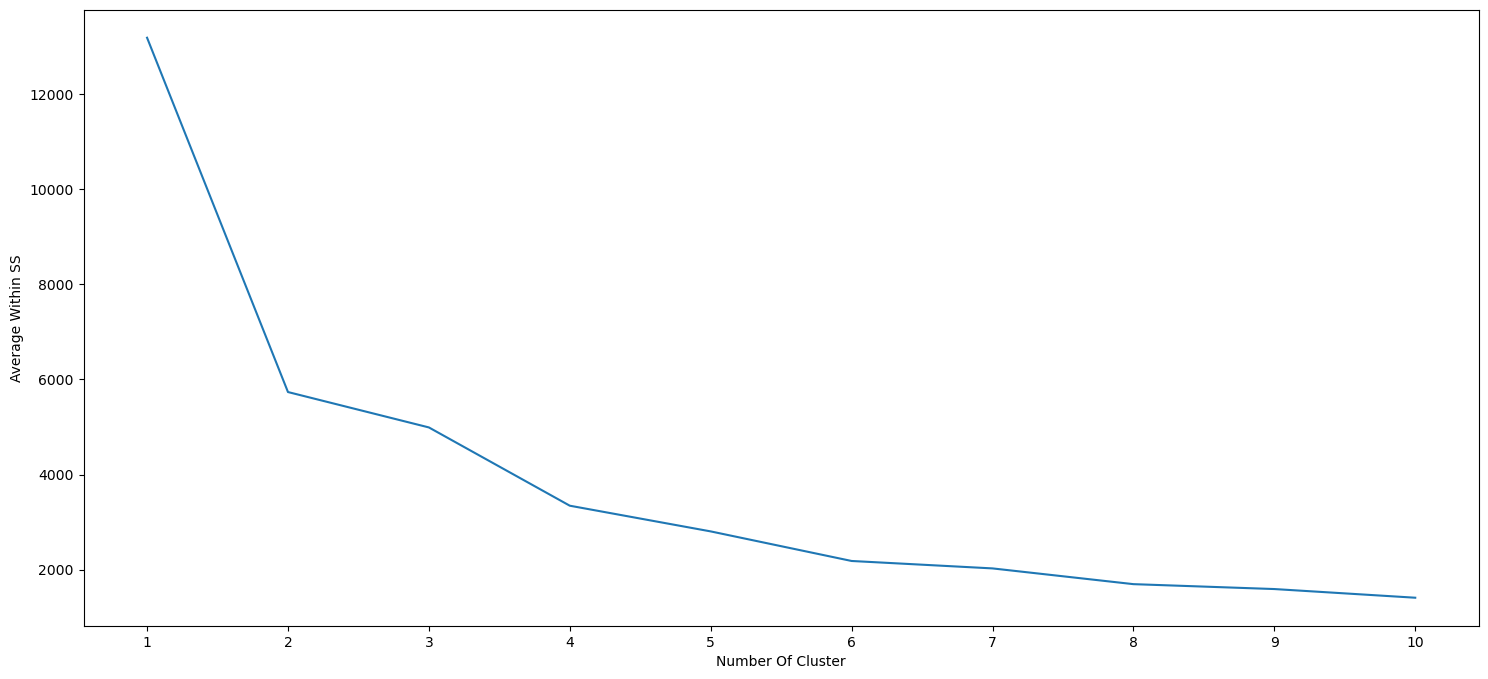

In [94]:
plt.figure(figsize=(18,8))
plt.plot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

In [95]:
kmeans = KMeans(n_clusters= 2,random_state= 42)
kmeans.fit(count_data)

KMeans(n_clusters=2, random_state=42)

In [96]:
country_clust = count_data.copy()
country_clust['clustkmeans'] = kmeans.labels_

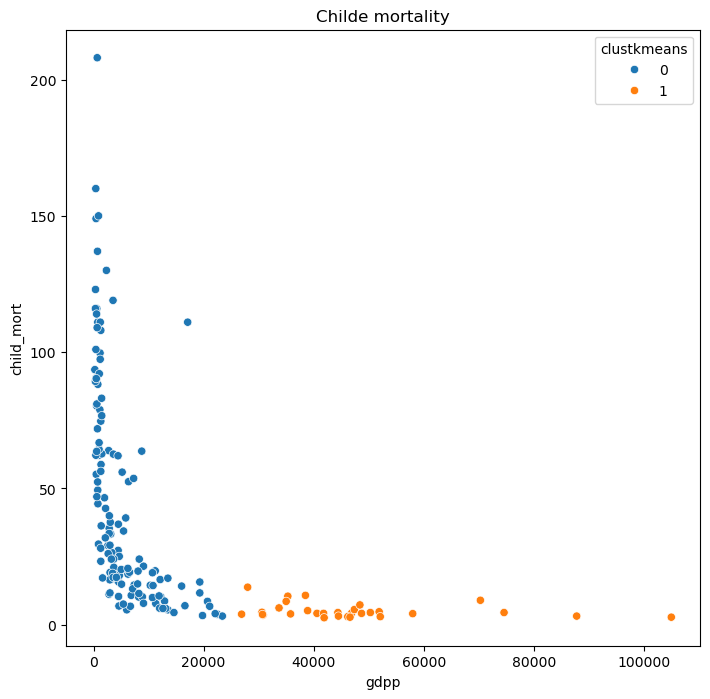

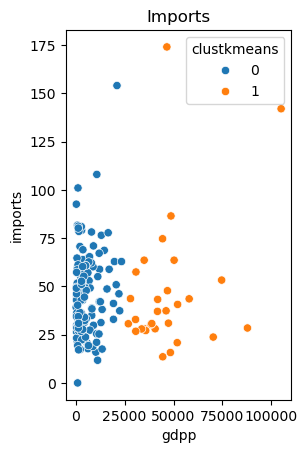

In [97]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.scatterplot(x = country_clust["gdpp"],y=country_clust["child_mort"],hue = country_clust["clustkmeans"])
plt.title("Childe mortality")
plt.show()
plt.subplot(1,2,2)
sns.scatterplot(x = country_clust["gdpp"],y=country_clust["imports"],hue = country_clust["clustkmeans"])
plt.title("Imports")
plt.show()

In [98]:
cluster_name = ['Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange']
mortality = ['Low GDPP VS Low to Medium Child Mortality', 'Medium GDPP VS Low Child Mortality']
imports = ['Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
best_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
best_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster 0,Low GDPP VS Low to Medium Child Mortality,Low GDPP VS Medium Imports
1,Orange,Cluster 1,Medium GDPP VS Low Child Mortality,Medium GDPP VS Medium Imports


# DBSCAN

In [100]:
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)


In [105]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan'] = labels

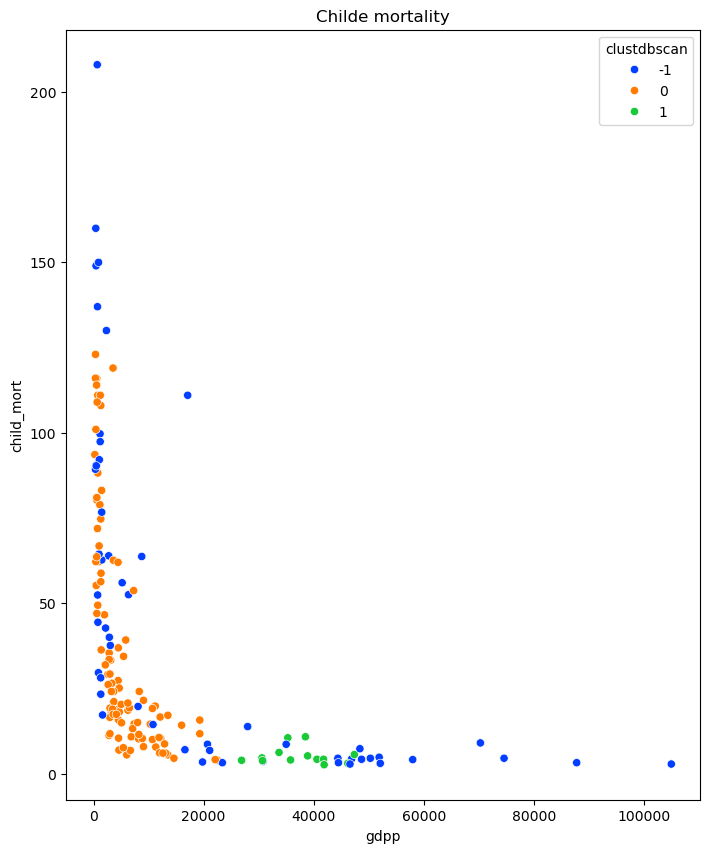

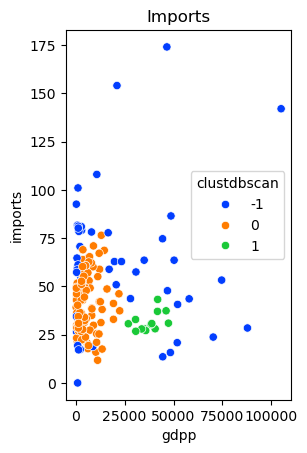

In [107]:
plt.figure(figsize = (18,10))
plt.subplot(1,2,1)
sns.scatterplot(x = country_clust["gdpp"],y=country_clust["child_mort"],hue = country_clust["clustdbscan"],palette = 'bright')
plt.title("Childe mortality")
plt.show()
plt.subplot(1,2,2)
sns.scatterplot(x = country_clust["gdpp"],y=country_clust["imports"],hue = country_clust["clustdbscan"], palette = 'bright')
plt.title("Imports")
plt.show()

In [108]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange', 'Green']
mortality = ['Noise', 'Low GDPP VS Low to Medium Imports', 'Medium GDPP VS Low Imports']
imports = ['Noise', 'Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDPP VS Low to Medium Imports,Low GDPP VS Medium Imports
2,Green,Cluster 1,Medium GDPP VS Low Imports,Medium GDPP VS Medium Imports
